# Importation et Initialisation

**Pour le changement des dossiers avec cd** :
Ceci passe uniquement sans ! devant la command cd.
seulement qu'il arrive que les commandes ne passent pas sans !. En cas d'erreur il est préférable de créer un nouvel espace de code et taper de nouveau la commande sans !

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd /content/drive/MyDrive/Object_detection_TF/Tensorflow/


/content/drive/MyDrive/Object_detection_TF/Tensorflow


Importation des librairies

In [ ]:
import os
from pathlib import PurePath

Declaration des constantes

In [ ]:
CUSTOM_MODEL_NAME = 'mon_ssd_mobilenet_v2_fpnlite' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
TF_PARTITION_DATASET_SCRIPT_NAME = 'partition_dataset.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

Initialisation de quelques chemins

In [ ]:

paths = {
    'CHEMIN_PROJET' : '/content/drive/MyDrive/Object_detection_TF/Tensorflow/',
    'WORKSPACE_PATH': 'workspace',
    'SCRIPTS_PATH': 'scripts/preprocessing/',    
    'APIMODEL_PATH': 'models/',
    'ANNOTATION_PATH':'workspace/annotations/',
    'IMAGE_PATH':'workspace/training_demo/images-2',
    'MODEL_PATH': 'workspace/training_demo/',
    'TRAINING_DEMO': 'workspace/training_demo/',
    'PRETRAINED_MODEL_PATH': 'workspace/training_demo/pre-trained-models/',
    'CHECKPOINT_PATH_MON_SSD_MOBILENET': 'workspace/training_demo/models/'+CUSTOM_MODEL_NAME, 
    'OUTPUT_PATH': 'workspace/training_demo/models/'+CUSTOM_MODEL_NAME + '/export/', 
    'TFJS_PATH':'workspace/training_demo/models/' + CUSTOM_MODEL_NAME + '/tfjsexport/', 
    'TFLITE_PATH':'workspace/training_demo/models/' + CUSTOM_MODEL_NAME + '/tfliteexport/', 
    'PROTOC_PATH':'protoc'
 }

In [ ]:
files = {
    'PIPELINE_CONFIG': paths[ 'CHECKPOINT_PATH_MON_SSD_MOBILENET'] +'/pipeline.config',
    'OUTPUT_PIPELINE_CONFIG': paths[ 'OUTPUT_PATH'] + '/pipeline.config',
    'TF_RECORD_SCRIPT': paths['SCRIPTS_PATH'] + '/' + TF_RECORD_SCRIPT_NAME, 
    'LABELMAP': paths['ANNOTATION_PATH']   +LABEL_MAP_NAME
}

Création des dossiers

In [ ]:
# for path in paths.values():
#   !mkdir -p {path}

# 1. Telechargement des models zoo tensorflow  et Installation de la librairie TFOD (TensorFlow Object Detection)

In [ ]:
# https://www.tensorflow.org/install/source_windows

In [ ]:
!pip install wget
import wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=83afa2293c62fab9bdc31db32f6411bafea2e85162497a3b5cd3998a5b112d73
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


Récuperation des models tensorflow

In [ ]:
# if not os.path.exists(PurePath(paths['APIMODEL_PATH'], 'research', 'object_detection')):
#     !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Récuperation de la librairie protoc et installation de TFOD

In [ ]:
#variable d'environement
# os.environ['PATH'] += os.pathsep + /content/drive/MyDrive/Object_detection_TF/Tensorflow/protoc/bin 
os.environ['PYTHONPATH'] += os.pathsep + '/content/drive/MyDrive/Object_detection_TF/Tensorflow/models/research/slim'

Missing input file.


In [ ]:
cd /content/drive/MyDrive/Object_detection_TF/Tensorflow/models/research

/content/drive/MyDrive/Object_detection_TF/Tensorflow/models/research


In [ ]:
!cp object_detection/packages/tf2/setup.py  setup.py

In [ ]:
!protoc object_detection/protos/*.proto --python_out=. && python setup.py build && python setup.py install

running build
running build_py
copying object_detection/protos/anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/argmax_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/calibration_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_predictor_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/center_net_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/eval_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/bipartite_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/flexible_grid_anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/fpn_pb2.py -> build/li

chercher comment resoudre cette erreur :
---
`error: keras 2.6.0 is installed but keras<2.8,>=2.7.0rc0 is required by {'tensorflow'}`


In [ ]:
# cd /content/drive/MyDrive/Object_detection_TF/Tensorflow/models/research/slim
# pip install -e . 

Obtaining file:///content/drive/MyDrive/Object_detection_TF/Tensorflow/models/research/slim
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Can't uninstall 'slim'. No files were found to uninstall.
  Running setup.py develop for slim


Vérification après installation de TFOD

Verification de TFOD après installation

In [ ]:
cd /content/drive/MyDrive/Object_detection_TF/Tensorflow/models/research/object_detection/builders/

/content/drive/MyDrive/Object_detection_TF/Tensorflow/models/research/object_detection/builders


In [ ]:
! python model_builder_tf2_test.py

2021-12-08 04:17:20.487536: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W1208 04:17:20.911062 140548274993024 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.72s
I1208 04:17:21.207342 140548274993024 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.72s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.61s
I1208 04:17:21.821135 140548274993024 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_cr

Mise à jour de Tensorflow

In [ ]:
# !pip install tensorflow --upgrade

Installation de matplotlib

In [ ]:
# !pip uninstall protobuf matplotlib -y
# !pip install protobuf matplotlib

Importation de la librairie Object detection

## Récuperation du model préentrainé ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8

In [ ]:
# if os.name == 'nt':
#     wget.download(PRETRAINED_MODEL_URL)
#     !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
#     !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

## Création du dictionnaire des labels

In [ ]:
cd /content/drive/MyDrive/Object_detection_TF/Tensorflow/

/content/drive/MyDrive/Object_detection_TF/Tensorflow


In [ ]:
labels = [{'name':'joseph', 'id':1}, {'name':'felix', 'id':2}]

with open(files['LABELMAP'], 'w') as f:     
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# Creation d'un TF records

Récuperation d'un script de generation des TF records

Generation des TF records

In [ ]:
!python {files['TF_RECORD_SCRIPT']} -x {PurePath(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {PurePath(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {PurePath(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {PurePath(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: workspace/annotations/train.record
Successfully created the TFRecord file: workspace/annotations/test.record


# Mise à jour pour l'apprentissage par transfert

In [ ]:
cd /content/drive/MyDrive/Object_detection_TF/Tensorflow/models/research  

/content/drive/MyDrive/Object_detection_TF/Tensorflow/models/research


In [ ]:
import tensorflow as tf
from object_detection.utils import config_util #Necessite etre dans le dossier research {cd /content/drive/MyDrive/Object_detection_TF/Tensorflow/models/research}
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [ ]:
config = config_util.get_configs_from_pipeline_file(PurePath(paths['CHEMIN_PROJET'], files['PIPELINE_CONFIG']))

In [ ]:
config

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "workspace/annotations/label_map.pbtxt"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "workspace/annotations//test.record"
 },
 'eval_input_configs': [label_map_path: "workspace/annotations/label_map.pbtxt"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "workspace/annotations//test.record"
 }
 ],
 'model': ssd {
   num_classes: 2
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: R

In [ ]:
cd /content/drive/MyDrive/Object_detection_TF/Tensorflow

/content/drive/MyDrive/Object_detection_TF/Tensorflow


In [ ]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [ ]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = paths['PRETRAINED_MODEL_PATH']+"/"+ PRETRAINED_MODEL_NAME+ '/checkpoint/'+ 'ckpt-0'
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [paths['ANNOTATION_PATH'] +"/"+ 'train.record']
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [paths['ANNOTATION_PATH']+"/" + 'test.record']

In [ ]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [ ]:
config

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "workspace/annotations/label_map.pbtxt"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "workspace/annotations//test.record"
 },
 'eval_input_configs': [label_map_path: "workspace/annotations/label_map.pbtxt"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "workspace/annotations//test.record"
 }
 ],
 'model': ssd {
   num_classes: 2
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: R

# Entrainement du modèle

**Note** : L'entrainement du modele prend près de 3 heures d'execution sur GPU

In [ ]:
cd /content/drive/MyDrive/Object_detection_TF/Tensorflow

/content/drive/MyDrive/Object_detection_TF/Tensorflow


In [ ]:
TRAINING_SCRIPT = PurePath(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [ ]:
entrainement_modele  ="python {} --model_dir={} --pipeline_config_path={} ".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH_MON_SSD_MOBILENET'],files['PIPELINE_CONFIG'])

In [ ]:
entrainement_modele

'python models/research/object_detection/model_main_tf2.py --model_dir=workspace/training_demo/models/mon_ssd_mobilenet_v2_fpnlite --pipeline_config_path=workspace/training_demo/models/mon_ssd_mobilenet_v2_fpnlite/pipeline.config '

In [ ]:
# !{entrainement_modele}

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 'Loss/regularization_loss': 0.1261105,
 'Loss/total_loss': 0.1932049,
 'learning_rate': 0.07558186}
I1207 22:18:32.872673 139828316690304 model_lib_v2.py:701] {'Loss/classification_loss': 0.05400767,
 'Loss/localization_loss': 0.013086727,
 'Loss/regularization_loss': 0.1261105,
 'Loss/total_loss': 0.1932049,
 'learning_rate': 0.07558186}
INFO:tensorflow:Step 8500 per-step time 0.191s
I1207 22:18:51.934494 139828316690304 model_lib_v2.py:700] Step 8500 per-step time 0.191s
INFO:tensorflow:{'Loss/classification_loss': 0.04380781,
 'Loss/localization_loss': 0.01988026,
 'Loss/regularization_loss': 0.12544468,
 'Loss/total_loss': 0.18913275,
 'learning_rate': 0.07546397}
I1207 22:18:51.934845 139828316690304 model_lib_v2.py:701] {'Loss/classification_loss': 0.04380781,
 'Loss/localization_loss': 0.01988026,
 'Loss/regularization_loss': 0.12544468,
 'Loss/total_loss': 0.18913275,
 'learning_rate': 0.07546397}
IN

# Evaluation du Modèle

**Note** : L'evaluation du modele prend près de 3 heures d'execution sur GPU

In [ ]:
evaluation_modele = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH_MON_SSD_MOBILENET'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH_MON_SSD_MOBILENET'])

In [ ]:
print(evaluation_modele)

python models/research/object_detection/model_main_tf2.py --model_dir=workspace/training_demo/models/mon_ssd_mobilenet_v2_fpnlite --pipeline_config_path=workspace/training_demo/models/mon_ssd_mobilenet_v2_fpnlite/pipeline.config --checkpoint_dir=workspace/training_demo/models/mon_ssd_mobilenet_v2_fpnlite


In [ ]:
# !{evaluation_modele}

W1208 00:32:14.779444 140032766453632 model_lib_v2.py:1082] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I1208 00:32:14.779761 140032766453632 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1208 00:32:14.779908 140032766453632 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I1208 00:32:14.780058 140032766453632 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W1208 00:32:14.780246 140032766453632 model_lib_v2.py:1103] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-12-08 00:32:15.325293: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original confi

#Exportation du model

In [ ]:
cd /content/drive/MyDrive/Object_detection_TF/Tensorflow  

/content/drive/MyDrive/Object_detection_TF/Tensorflow


In [ ]:
!cp {PurePath(paths['APIMODEL_PATH'], 'research','object_detection' , 'exporter_main_v2.py')} {os.path.join(paths['MODEL_PATH'])}

In [ ]:
extration_model  ="python ./{}exporter_main_v2.py --input_type image_tensor --pipeline_config_path ./{} --trained_checkpoint_dir ./{} --output_directory ./{}".format(paths['MODEL_PATH'], files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH_MON_SSD_MOBILENET'],paths['OUTPUT_PATH'])

In [ ]:
print(extration_model)

python ./workspace/training_demo/exporter_main_v2.py --input_type image_tensor --pipeline_config_path ./workspace/training_demo/models/mon_ssd_mobilenet_v2_fpnlite/pipeline.config --trained_checkpoint_dir ./workspace/training_demo/models/mon_ssd_mobilenet_v2_fpnlite --output_directory ./workspace/training_demo/models/mon_ssd_mobilenet_v2_fpnlite/export/


In [ ]:
!{extration_model}

2021-12-08 03:55:53.324445: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W1208 03:55:53.507647 140337633249152 deprecation.py:619] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:464: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W1208 03:56:15.078023 14033763324

# Chargement du modèle

In [ ]:
# cd /usr/local/lib/python3.7/dist-packages/

/usr/local/lib/python3.7/dist-packages


Quelques librairies causes des problemes (tf-slim, tensorflow.io official et tant d'autres) pour ce faire, nous determinons leurs dossiers d'installation.

---
Executer chaque ligne de maniere individuelle en mettant en commentaire les autres


In [ ]:
import sys
sys.path.extend([
# r'/usr/local/lib/python3.7/dist-packages/tf_slim-1.1.0-py3.7.egg/'
# r'/content/drive/MyDrive/Object_detection_TF/Tensorflow/models/research/slim'
r'/content/drive/MyDrive/Object_detection_TF/Tensorflow/models'
# r'/usr/local/lib/python3.7/dist-packages/tensorflow_io-0.22.0-py3.7-linux-x86_64.egg/'
])


In [ ]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util



In [ ]:
cd /content/drive/MyDrive/Object_detection_TF/Tensorflow

/content/drive/MyDrive/Object_detection_TF/Tensorflow


In [ ]:
# Load pipeline config and build a detection model
print(files['OUTPUT_PIPELINE_CONFIG']);
configs = config_util.get_configs_from_pipeline_file(files['OUTPUT_PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# # Restore checkpoint
print(paths['OUTPUT_PATH']);
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['OUTPUT_PATH'],'checkpoint', 'ckpt-0')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

workspace/training_demo/models/mon_ssd_mobilenet_v2_fpnlite/export//pipeline.config
workspace/training_demo/models/mon_ssd_mobilenet_v2_fpnlite/export/


# Detection

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
print(paths['IMAGE_PATH'])

workspace/training_demo/images-2


In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
category_index

{1: {'id': 1, 'name': 'joseph'}, 2: {'id': 2, 'name': 'felix'}}

Agrandir la taille de police de sortie

Importer une image dans colab et tester ou utilisez une image stockée sur google drive

In [ ]:

# IMAGE_PATH ='/content/Joseph89.jpg'
# img = cv2.imread(IMAGE_PATH)
#7.jpg
IMAGE_DRIVE_PATH = paths['CHEMIN_PROJET'] + paths['IMAGE_PATH']+'/prediction/Felix284.jpg'
img = cv2.imread(IMAGE_DRIVE_PATH)

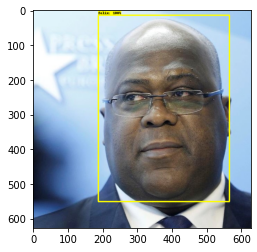

In [ ]:
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))

detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=.30,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()